In [33]:

import mne
import matplotlib.pyplot as plt
import numpy as np
import os 
import librosa

In [14]:
testfile=mne.io.read_raw_edf(chb_mit+"/"+file,preload=True)
testfile._data[1,921600]

Extracting EDF parameters from /home/hawk/epml/chb-mit/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-14-f95ff55c1c46>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  testfile=mne.io.read_raw_edf(chb_mit+"/"+file,preload=True)


IndexError: index 921600 is out of bounds for axis 1 with size 921600

In [62]:
base_dir = ""
chb_mit = "chb-mit"
training_folder="./training/"
segment_size = 153600
recording_size = 921600
last_step = 0
increment_last_step = False
for file in os.listdir(base_dir+chb_mit):
    print(file)
    eeg_file = mne.io.read_raw_edf(chb_mit+"/"+file,preload=True)
    eeg_file.notch_filter(np.arange(50, 128, 50))  
    for index,current_step in enumerate(range(153600,recording_size+1,segment_size)):
        segment = np.array(eeg_file._data[0:18,last_step:current_step])
        print(segment.shape)
        stft_segment = []
        for channel in segment: 
            stft_segment.append(librosa.stft(channel,n_fft=2048,win_length=2048,hop_length=1024))
        last_step=current_step
        preprocessed_file_name = file.split(".")[0]+"_{}".format(index+1)+".npy"
        stft_segment = np.array(stft_segment)
        stft_segment = np.abs(stft_segment)
        np.save(training_folder+preprocessed_file_name,stft_segment,allow_pickle=False)
        

chb01_01.edf
Extracting EDF parameters from /home/hawk/epml/chb-mit/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-62-c745c572d9c8>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  eeg_file = mne.io.read_raw_edf(chb_mit+"/"+file,preload=True)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

(18, 153600)
(18, 153600)
(18, 153600)
(18, 153600)
(18, 153600)
(18, 153600)


In [64]:

stft_segment.shape


(18, 1025, 151)

Extracting EDF parameters from /home/hawk/epml/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-2-efeb1db4071a>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  eeg_file = mne.io.read_raw_edf("chb01_01.edf",preload=True)


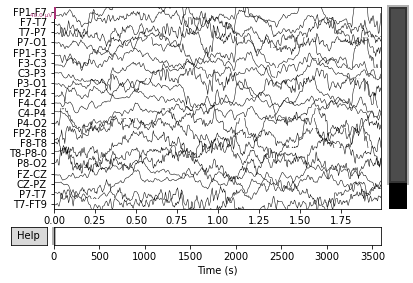

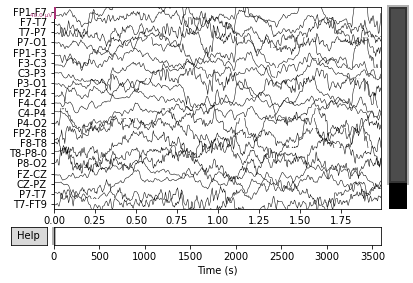

In [2]:
eeg_file = mne.io.read_raw_edf("chb01_01.edf",preload=True)
eeg_file.plot(duration=2,bgcolor="blue")

Marked Bad Channels:['P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


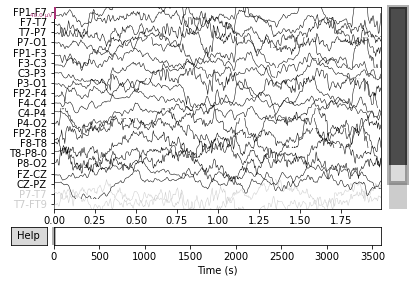

Channel Names after removing bad channels 23


In [3]:
eeg_file.info['bads'] = eeg_file.ch_names[18:23]
print("Marked Bad Channels:{}".format(eeg_file.info['bads']))
picks=mne.pick_types(eeg_file.info,eeg=True,exclude="bads")
print(picks)
eeg_file.plot(duration=2)
print("Channel Names after removing bad channels {}".format(len(eeg_file.ch_names)))

In [8]:
no_of_samples = eeg_file._data.shape[1]
window_size = 153600

921600

In [10]:
eeg_file.notch_filter(np.arange(50, 101, 50)) 

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



<RawEDF | chb01_01.edf, 23 x 921600 (3600.0 s), ~161.7 MB, data loaded>

In [51]:
last_sample =0
for index,sample in range(0,no_of_samples+1,window_size):
    segmented_array=np.array(last_sample:no_of)
    file_name = "chb_01_%s"index
    

In [10]:
eeg_file.pick_types(eeg=True,exclude=eeg_file.info["bads"])
eeg_file._ch_names

IndexError: index 0 is out of bounds for axis 0 with size 0

In [45]:
filter_input=np.arange(50,251,50)
filter_input

array([ 50, 100, 150, 200, 250])

In [37]:
eeg_file.ch_names

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

In [41]:
np_array=np.delete(np_array,([18,19,20,21,22]),axis=0)

In [43]:
np_array.shape

(18, 921600)

Setting up band-stop filter from 0.5 - 1.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 1.50 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 1.75 Hz)
- Filter length: 1691 samples (6.605 sec)



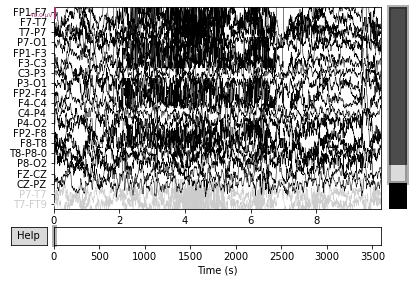

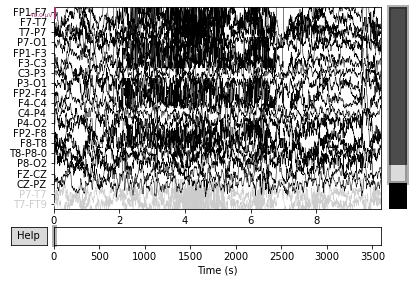

(23, 921600)
(23, 921600)
False


In [60]:
filtered_data=eeg_file.notch_filter(1)
type(filtered_data)
filtered_data.plot(duration=10)
eeg_file.plot(duration=10)
print(np_array.shape)
print(filtered_data._data.shape)
print(filtered_data == np_array)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7.5 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.50
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.50 Hz)
- Upper passband edge: 12.50 Hz
- Upper transition bandwidth: 3.12 Hz (-6 dB cutoff frequency: 14.06 Hz)
- Filter length: 423 samples (1.652 sec)



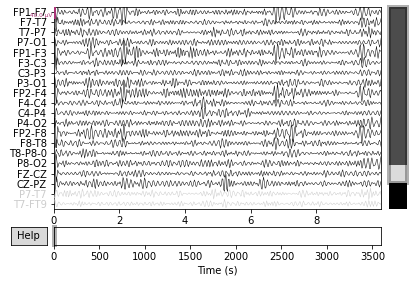

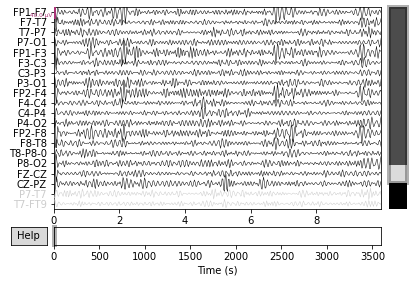

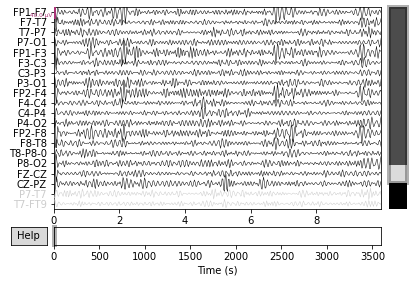

In [65]:
bandpass_filter_data=eeg_file.filter(l_freq=7.5,h_freq=12.5)
eeg_file.plot()
bandpass_filter_data.plot()

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


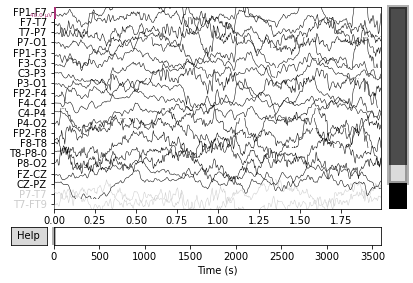

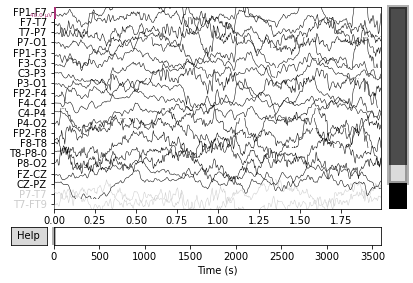

In [52]:
print(np_array == eeg_file._data)
eeg_file.plot(duration=2)